In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [2]:
NL_t = 0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3

Me = 511005.0
ke = 100*1.0e6
energy = ke+Me
freq = 30*1.0e6
offset = 0.0003
delta = 1.0e-7

g = energy/Me
bg = np.sqrt(g**2-1.0)
vec = bg/g*impact.data.clight

turns = 2048

alfaEntrance = np.tan(np.pi*NL_mu)
betaEntrance = NL_L/np.sin(2.0*np.pi*NL_mu)

# Prepare beam & lattice

In [3]:
beam, lattice = impact.readInputFile('test_shifted.in')

reading ImpactZ input file (test_shifted.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
beam.current = 0.0
beam.kinetic_energy = ke
beam.mass = Me
beam.charge = -1.0
beam.frequency = freq
beam.nCore_y = 1
beam.nCore_z = 1
beam.n_particles = 1
beam.current = 0.0

In [5]:
lattice = [ item for item in lattice if not item.type == 'write_raw_ptcl' ]
lattice[0].turns = turns

In [6]:
L=0.0
for i in range(len(lattice)):
    if 'length' in lattice[i].keys():
        L = L+lattice[i].length
print(L)

39.96822971580008


In [7]:
beam.distribution.distribution_type = 'Waterbag'
beam.distribution.betx  = betaEntrance
beam.distribution.alfx  = alfaEntrance
beam.distribution.emitx = 0.0
beam.distribution.bety  = betaEntrance
beam.distribution.alfy  = alfaEntrance
beam.distribution.emity = 0.0
beam.distribution.betz  = 0.0
beam.distribution.alfz  = 0.0
beam.distribution.emitz = 0.0
beamOff = copy(beam)

# run

In [ ]:
nSample = 5
X=[]
Y=[]
for d in np.linspace(-delta,+delta,nSample):
    print(d)
    beamOff = copy(beam)
    beamOff.distribution.offsety = offset+d
    impact.writeInputFile(beamOff,lattice)
    impact.run(beam)
    fort82=np.loadtxt('fort.82')
    X.append(fort82[:,1] + 1j*fort82[:,2])
    Y.append(fort82[:,3] + 1j*fort82[:,4])

-1e-07
input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles
-5e-08
input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles


In [16]:
Tune=[0]*nSample
Amp =[0]*nSample
Y1  =[0]*nSample
emitlist = [0]*nSample
for i in range(nSample):
    Tune[i],Amp[i],Y1[i] = impact.util.naff(1,Y[i])
    print('initial kick X,Y   = ',X[i][0],Y[i][0])
    print('initial kick angle = ',np.angle(Y[i][0]))
    emitlist[i] = np.abs(Y[i][0])**2/2.0

initial kick X,Y   =  0j (0.04732449199538721+0.023341463520805718j)
initial kick angle =  0.45821023127527993
initial kick X,Y   =  0j (0.0473323769061575+0.023345338984462043j)
initial kick angle =  0.45821000110203786
initial kick X,Y   =  0j (0.0473402618143663+0.02334921444010307j)
initial kick angle =  0.4582097708906998
initial kick X,Y   =  0j (0.04734814672001279+0.02335308988772743j)
initial kick angle =  0.4582095406412685
initial kick X,Y   =  0j (0.04735603162309576+0.0233569653273334j)
initial kick angle =  0.45820931035374374


[-0.91657649]


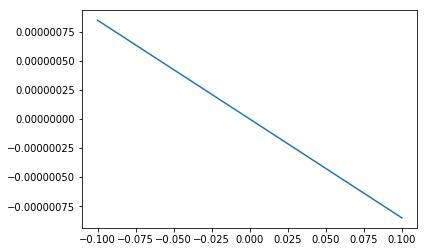

In [15]:
plt.plot(np.linspace(-delta,delta,nSample)*1.0e6,Tune-Tune[int(nSample/2)])
print((Tune[-1]-Tune[0])/(emitlist[-1]-emitlist[0]))

In [14]:
pData=impact.readParticleData(-111110,ke,Me,freq)
print(pData)

[[ 0.00000000e+00  0.00000000e+00  3.00100000e-04  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.95692801e-06 -0.00000000e+00
   1.00000000e+00]]


In [13]:
print(Tune)

[array([0.86453961]), array([0.86453918]), array([0.86453876]), array([0.86453833]), array([0.86453791])]
